# Week 3.1 Audio Features and Spotify Playlists 

For the second part of this week's lecture we are going to look at 

* The audio features that``Spotify's API`` will give us about **any track in its collection**


* How these can be used to make recommendations based on song similarity 


First we need to install the ``spotipy`` library. The Spotify API is just a ``REST API`` like we might have seen before, so we could access using the ``request`` library ourselves, but this just wraps up some stuff nicely for us!

In [1]:
## Install library 
!pip install spotipy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 135.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 118.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
  Attempting uninstall: async-timeout
    Found existing installation: async-timeout 3.0.1
    Uninstalling async-timeout-3.0.1:
      Successfully uninstalled async-timeout-3.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiohttp 3.7.4 requires async-timeout<4.0,>=3.0, but you have async-timeout 4.0.3 which is incompatible.
google-auth 2.22.0 requires urllib3<2.0, but you have urllib3 2.2.1 which is incompatible.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but y

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
##These relate to an App on my developer account at Spotify and are used for authentication 
SPOTIPY_CLIENT_ID='4547ac9120de4cbba75a19ee6dc3b908'
SPOTIPY_CLIENT_SECRET='75fa035f5a0b47b7868e69a93ef878b4'

In [4]:
##First we authenticate
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

### Pick a playlist 

Now we need to pick a playlist to get some audio features for. 

To get the ``id``, sign into the [Spotify Web Player](https://open.spotify.com/) in your browser. When you have chosen a playlist (can be one of yours, or someone elses), the ``id`` will be the string of letters and numbers at the end of the ``URL``. 

In [8]:
#Put in the ID of a Spotify playlist of your choosing
playlist_id = '37i9dQZF1DXcBWIGoYBM5M'

In [9]:
limit = 50
trim = True

In [10]:
#Get playlsit
playlist = sp.playlist(playlist_id)
#Extract tracks
tracks = playlist["tracks"]["items"]
if trim:
    tracks = tracks[-limit:]
#Extract track IDs
ids = [track["track"]["id"] for track in tracks]
#Get audio features for tracks
features =  pd.DataFrame(sp.audio_features(ids))    
#Label dataframe rows with track name and artist
labels = [track["track"]["artists"][0]["name"] + " - "+ track["track"]["name"] for track in tracks]
features.index = labels

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


In [11]:
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
"Ariana Grande - yes, and?",0.788,0.7580,1,-6.513,1,0.0505,0.19800,0.000085,0.1040,0.8230,119.008,audio_features,7gaA3wERFkFkgivjwbSvkG,spotify:track:7gaA3wERFkFkgivjwbSvkG,https://api.spotify.com/v1/tracks/7gaA3wERFkFk...,https://api.spotify.com/v1/audio-analysis/7gaA...,214994,4
Teddy Swims - Lose Control,0.561,0.6040,9,-4.409,1,0.0337,0.19900,0.000019,0.1040,0.2420,159.920,audio_features,17phhZDn6oGtzMe56NuWvj,spotify:track:17phhZDn6oGtzMe56NuWvj,https://api.spotify.com/v1/tracks/17phhZDn6oGt...,https://api.spotify.com/v1/audio-analysis/17ph...,210689,3
Beyoncé - TEXAS HOLD 'EM,0.725,0.7090,2,-6.514,1,0.0720,0.58800,0.000000,0.1350,0.3530,110.024,audio_features,0Z7nGFVCLfixWctgePsRk9,spotify:track:0Z7nGFVCLfixWctgePsRk9,https://api.spotify.com/v1/tracks/0Z7nGFVCLfix...,https://api.spotify.com/v1/audio-analysis/0Z7n...,235636,4
Benson Boone - Beautiful Things,0.472,0.4710,10,-5.692,1,0.0603,0.15100,0.000000,0.1400,0.2190,105.029,audio_features,6tNQ70jh4OwmPGpYy6R2o9,spotify:track:6tNQ70jh4OwmPGpYy6R2o9,https://api.spotify.com/v1/tracks/6tNQ70jh4Owm...,https://api.spotify.com/v1/audio-analysis/6tNQ...,180304,3
Tate McRae - greedy,0.750,0.7330,6,-3.180,0,0.0319,0.25600,0.000000,0.1140,0.8440,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1
SZA - Saturn,0.411,0.6190,1,-6.834,1,0.0368,0.62000,0.000000,0.1100,0.3370,177.937,audio_features,1bjeWoagtHmUKputLVyDxQ,spotify:track:1bjeWoagtHmUKputLVyDxQ,https://api.spotify.com/v1/tracks/1bjeWoagtHmU...,https://api.spotify.com/v1/audio-analysis/1bje...,186192,4
Noah Kahan - Stick Season,0.662,0.4880,9,-6.894,1,0.0682,0.78200,0.000000,0.1020,0.8170,117.913,audio_features,0mflMxspEfB0VbI1kyLiAv,spotify:track:0mflMxspEfB0VbI1kyLiAv,https://api.spotify.com/v1/tracks/0mflMxspEfB0...,https://api.spotify.com/v1/audio-analysis/0mfl...,182347,4
Dua Lipa - Training Season,0.815,0.5820,5,-4.500,0,0.0532,0.03650,0.000001,0.1380,0.6710,123.030,audio_features,6Qb7YsAqH4wWFUMbGsCpap,spotify:track:6Qb7YsAqH4wWFUMbGsCpap,https://api.spotify.com/v1/tracks/6Qb7YsAqH4wW...,https://api.spotify.com/v1/audio-analysis/6Qb7...,209488,4
Jack Harlow - Lovin On Me,0.943,0.5580,2,-4.911,1,0.0568,0.00260,0.000002,0.0937,0.6060,104.983,audio_features,4xhsWYTOGcal8zt0J161CU,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4
21 Savage - redrum,0.624,0.7400,2,-8.445,1,0.0481,0.00529,0.000224,0.5000,0.2460,172.089,audio_features,52eIcoLUM25zbQupAZYoFh,spotify:track:52eIcoLUM25zbQupAZYoFh,https://api.spotify.com/v1/tracks/52eIcoLUM25z...,https://api.spotify.com/v1/audio-analysis/52eI...,270698,4


### Audio Features 

What audio features do we get? You can check out the [Spotify API Documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

Some relate to known musical features such as ``key``, ``mode``,``tempo`` and ``time_signature``. 

Some are more related to the signal of the audio file itself (``loudness``, ``duration_ms``).

Some are more descriptive (``danceability``, `liveness` etc..). As these are self defined by Spotify, how subjective do you think these ones might be?

In [12]:
#Check out features
features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [13]:
#Drop columns that are not audio features
my_features = ['danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms', 
            'time_signature']
features = features[my_features]
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
"Ariana Grande - yes, and?",0.788,0.7580,1,-6.513,1,0.0505,0.19800,0.000085,0.1040,0.8230,119.008,214994,4
Teddy Swims - Lose Control,0.561,0.6040,9,-4.409,1,0.0337,0.19900,0.000019,0.1040,0.2420,159.920,210689,3
Beyoncé - TEXAS HOLD 'EM,0.725,0.7090,2,-6.514,1,0.0720,0.58800,0.000000,0.1350,0.3530,110.024,235636,4
Benson Boone - Beautiful Things,0.472,0.4710,10,-5.692,1,0.0603,0.15100,0.000000,0.1400,0.2190,105.029,180304,3
Tate McRae - greedy,0.750,0.7330,6,-3.180,0,0.0319,0.25600,0.000000,0.1140,0.8440,111.018,131872,1
SZA - Saturn,0.411,0.6190,1,-6.834,1,0.0368,0.62000,0.000000,0.1100,0.3370,177.937,186192,4
Noah Kahan - Stick Season,0.662,0.4880,9,-6.894,1,0.0682,0.78200,0.000000,0.1020,0.8170,117.913,182347,4
Dua Lipa - Training Season,0.815,0.5820,5,-4.500,0,0.0532,0.03650,0.000001,0.1380,0.6710,123.030,209488,4
Jack Harlow - Lovin On Me,0.943,0.5580,2,-4.911,1,0.0568,0.00260,0.000002,0.0937,0.6060,104.983,138411,4
21 Savage - redrum,0.624,0.7400,2,-8.445,1,0.0481,0.00529,0.000224,0.5000,0.2460,172.089,270698,4


### Task 1 - Sort by Audio Features 

In order to get a feel for features and what they represent, we are now going to use them to sort the playlist. 

Try out some different features. 

* What do low and high values for the each of the features sound like? 


* Given your knowledge of the songs, does this feel correct? 


* If there is a feature you are not sure what it measures, are you able to get a better understanding by looking at the sorted tracks?


* Does this sorted order of the playlist flow well?


In [14]:
sort_by = 'liveness'
features.sort_values(by = sort_by, ascending = False)[:10]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
YG Marley - Praise Jah In The Moonlight,0.660,0.727,6,-4.028,0,0.0441,0.12800,0.000013,0.524,0.418,125.023,263040,4
21 Savage - redrum,0.624,0.740,2,-8.445,1,0.0481,0.00529,0.000224,0.500,0.246,172.089,270698,4
Michael Marcagi - Scared To Start,0.527,0.551,7,-11.258,1,0.0345,0.38400,0.000003,0.403,0.443,148.035,159636,4
Drake - Rich Baby Daddy (feat. Sexyy Red & SZA),0.645,0.729,2,-4.560,1,0.0528,0.03770,0.000000,0.384,0.142,146.010,319192,4
The Weeknd - Popular (with Playboi Carti & Madonna),0.854,0.668,1,-6.243,1,0.2000,0.06040,0.000084,0.382,0.833,99.018,215467,4
Jung Kook - Standing Next to You,0.711,0.809,2,-4.389,0,0.0955,0.04470,0.000000,0.339,0.816,106.017,206020,4
Kygo - Whatever,0.576,0.776,3,-5.678,1,0.0660,0.11400,0.000000,0.333,0.596,107.943,178273,4
Olivia Rodrigo - vampire,0.511,0.532,5,-5.745,1,0.0578,0.17700,0.000000,0.291,0.350,138.005,219724,4
JID - Surround Sound (feat. 21 Savage & Baby Tate),0.575,0.560,5,-7.302,1,0.4780,0.17300,0.000000,0.257,0.471,75.956,229938,4
Xavi - La Diabla,0.751,0.819,11,-4.372,0,0.0409,0.25500,0.000000,0.236,0.697,131.842,172264,3


In [37]:
sort_by = 'time_signature'
features.sort_values(by = sort_by, ascending = False)[:10]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
"Ariana Grande - yes, and?",0.788,0.758,1,-6.513,1,0.0505,0.19800,0.000085,0.1040,0.8230,119.008,214994,4
Kali Uchis - Igual Que Un Ángel (with Peso Pluma),0.685,0.610,5,-5.360,0,0.0343,0.00348,0.000540,0.1830,0.4640,107.999,260371,4
Tate McRae - exes,0.821,0.575,5,-6.570,0,0.0589,0.17300,0.000242,0.1140,0.6110,136.962,159401,4
Doja Cat - Agora Hills,0.750,0.674,8,-6.128,0,0.0970,0.22800,0.000089,0.1220,0.3920,123.026,265360,4
Dua Lipa - Houdini,0.744,0.789,9,-4.876,0,0.0590,0.00360,0.001440,0.0947,0.8660,116.985,185918,4
Rema - Calm Down (with Selena Gomez),0.801,0.806,11,-5.206,1,0.0381,0.38200,0.000669,0.1140,0.8020,106.999,239318,4
The Weeknd - Popular (with Playboi Carti & Madonna),0.854,0.668,1,-6.243,1,0.2000,0.06040,0.000084,0.3820,0.8330,99.018,215467,4
JID - Surround Sound (feat. 21 Savage & Baby Tate),0.575,0.560,5,-7.302,1,0.4780,0.17300,0.000000,0.2570,0.4710,75.956,229938,4
Flo Milli - Never Lose Me,0.781,0.567,1,-7.857,1,0.0969,0.05040,0.000000,0.0981,0.0743,121.964,125902,4
Madison Beer - Make You Mine,0.514,0.658,6,-6.454,0,0.0414,0.21600,0.005860,0.2060,0.4660,123.171,220552,4


In [38]:

sort_by = 'instrumentalness'
features.sort_values(by = sort_by, ascending = False)[:10]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Mitski - My Love Mine All Mine,0.504,0.308,9,-14.958,1,0.0321,0.86800,0.135000,0.1580,0.121,113.950,137773,4
Good Neighbours - Home,0.583,0.676,6,-4.440,1,0.0298,0.02890,0.063400,0.1210,0.134,77.002,157486,4
Justin Timberlake - Selfish,0.690,0.543,1,-6.752,1,0.0364,0.07230,0.029100,0.0873,0.376,88.004,229332,4
Myke Towers - LA FALDA,0.800,0.738,7,-4.260,1,0.0691,0.37200,0.008770,0.1900,0.267,103.008,174230,4
Madison Beer - Make You Mine,0.514,0.658,6,-6.454,0,0.0414,0.21600,0.005860,0.2060,0.466,123.171,220552,4
Kenya Grace - Strangers,0.628,0.523,11,-8.307,0,0.0946,0.70100,0.002740,0.2190,0.416,169.982,172965,4
Djo - End of Beginning,0.689,0.454,2,-7.643,1,0.0584,0.03510,0.002590,0.0707,0.912,159.982,159246,4
Dua Lipa - Houdini,0.744,0.789,9,-4.876,0,0.0590,0.00360,0.001440,0.0947,0.866,116.985,185918,4
Rema - Calm Down (with Selena Gomez),0.801,0.806,11,-5.206,1,0.0381,0.38200,0.000669,0.1140,0.802,106.999,239318,4
Kali Uchis - Igual Que Un Ángel (with Peso Pluma),0.685,0.610,5,-5.360,0,0.0343,0.00348,0.000540,0.1830,0.464,107.999,260371,4


In [39]:
 
sort_by = 'loudness'
features.sort_values(by = sort_by, ascending = False)[:10]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Tate McRae - greedy,0.750,0.733,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,131872,1
Tyla - Water,0.673,0.722,3,-3.495,0,0.0755,0.0856,0.000000,0.1370,0.519,117.187,200256,4
YG Marley - Praise Jah In The Moonlight,0.660,0.727,6,-4.028,0,0.0441,0.1280,0.000013,0.5240,0.418,125.023,263040,4
Jung Kook - Seven (feat. Latto),0.802,0.832,11,-4.107,1,0.0434,0.3110,0.000000,0.0815,0.890,124.997,185427,4
Myke Towers - LA FALDA,0.800,0.738,7,-4.260,1,0.0691,0.3720,0.008770,0.1900,0.267,103.008,174230,4
Sabrina Carpenter - Feather,0.787,0.686,6,-4.370,0,0.0339,0.0893,0.000000,0.0927,0.836,123.510,185553,4
Xavi - La Diabla,0.751,0.819,11,-4.372,0,0.0409,0.2550,0.000000,0.2360,0.697,131.842,172264,3
Jung Kook - Standing Next to You,0.711,0.809,2,-4.389,0,0.0955,0.0447,0.000000,0.3390,0.816,106.017,206020,4
Teddy Swims - Lose Control,0.561,0.604,9,-4.409,1,0.0337,0.1990,0.000019,0.1040,0.242,159.920,210689,3
Good Neighbours - Home,0.583,0.676,6,-4.440,1,0.0298,0.0289,0.063400,0.1210,0.134,77.002,157486,4


### Task 2 - Song Similarity 

Now lets investigate which songs in the playlist are similar to each other based on a given set of features. 

Change the features in ``my_subset_features`` and re-run the code each time. 

* Do you think songs that have **high cosine similarity** (e.g. close to 1) are similar songs? 


* Do different subsets of features make seem to provide better results in this regard?

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.preprocessing import StandardScaler

In [16]:
my_subset_features = ['danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms', 
            'time_signature']

In [24]:
#Get subset
subset_features = features[my_subset_features]
#Standardise
scaled_features = StandardScaler().fit_transform(subset_features)
#Get cosine distances
similarities = cosine(scaled_features)
#Visualise 
similarities = pd.DataFrame(similarities, columns = features.index, index = features.index)
similarities.style.background_gradient(cmap='Greens')
#similarities.style.background_gradient(cmap='Blue')

,"Ariana Grande - yes, and?",Teddy Swims - Lose Control,Beyoncé - TEXAS HOLD 'EM,Benson Boone - Beautiful Things,Tate McRae - greedy,SZA - Saturn,Noah Kahan - Stick Season,Dua Lipa - Training Season,Jack Harlow - Lovin On Me,21 Savage - redrum,"The Weeknd - One Of The Girls (with JENNIE, Lily Rose Depp)",Tyla - Water,Kenya Grace - Strangers,Sabrina Carpenter - Feather,Ariana Grande - we can't be friends (wait for your love),Doja Cat - Paint The Town Red,Taylor Swift - Cruel Summer,Olivia Rodrigo - vampire,SZA - Snooze,Djo - End of Beginning,Mitski - My Love Mine All Mine,Zach Bryan - I Remember Everything (feat. Kacey Musgraves),Good Neighbours - Home,"Billie Eilish - What Was I Made For? [From The Motion Picture ""Barbie""]",Kali Uchis - Igual Que Un Ángel (with Peso Pluma),Drake - Rich Baby Daddy (feat. Sexyy Red & SZA),KAROL G - CONTIGO (with Tiësto),Tate McRae - exes,Doja Cat - Agora Hills,Dua Lipa - Houdini,Rema - Calm Down (with Selena Gomez),The Weeknd - Popular (with Playboi Carti & Madonna),JID - Surround Sound (feat. 21 Savage & Baby Tate),Flo Milli - Never Lose Me,Madison Beer - Make You Mine,Pharrell Williams - Doctor (Work It Out) [feat. Miley Cyrus],Myke Towers - LA FALDA,Muni Long - Made For Me,Michael Marcagi - Scared To Start,Bryson Tiller - Whatever She Wants,Jung Kook - Seven (feat. Latto),Taylor Swift - Is It Over Now? (Taylor's Version) (From The Vault),Kygo - Whatever,Justin Timberlake - Selfish,Miley Cyrus - Flowers,Selena Gomez - Love On,David Kushner - Daylight,Xavi - La Diabla,YG Marley - Praise Jah In The Moonlight,Jung Kook - Standing Next to You
"Ariana Grande - yes, and?",1.000000,-0.342811,0.406431,-0.634682,0.018222,-0.048853,-0.021062,0.214510,0.451829,0.022004,-0.280729,0.191180,-0.546373,0.363045,0.120726,0.391094,-0.090022,-0.379945,-0.212942,0.359093,-0.405958,-0.176376,-0.214544,-0.259418,-0.026706,0.072030,0.079590,0.071113,-0.112807,0.253540,0.400432,0.439899,-0.141580,-0.018190,-0.384680,0.475442,0.022456,-0.567956,-0.354172,-0.337516,0.419359,0.197510,0.259460,0.243474,0.777872,0.536136,-0.308091,-0.079519,-0.168934,0.356475
Teddy Swims - Lose Control,-0.342811,1.000000,-0.175186,0.662166,0.409299,0.385477,0.009666,-0.224418,-0.314611,0.142579,0.188417,-0.177887,0.245013,-0.177007,0.169833,-0.438250,0.483937,0.378860,0.364892,0.015258,-0.036500,-0.116404,-0.019935,-0.192804,-0.141164,0.187810,-0.036303,-0.202672,0.020532,-0.113386,0.030968,-0.544324,-0.268539,-0.099190,0.054555,-0.356025,-0.019699,0.066965,0.090849,-0.263083,0.121094,-0.105578,-0.214386,-0.297306,-0.141182,-0.260239,-0.046696,0.354525,-0.050489,-0.467622
Beyoncé - TEXAS HOLD 'EM,0.406431,-0.175186,1.000000,-0.338570,-0.235983,0.251160,0.167579,-0.358284,-0.088286,0.089679,0.084121,-0.124307,-0.200459,-0.355786,0.241760,0.260667,-0.312119,-0.097093,-0.134088,-0.359562,-0.054112,0.476766,-0.109221,0.277419,-0.118880,0.313209,0.173513,-0.428688,0.092414,-0.424768,0.250487,0.115371,0.070449,-0.020195,-0.260269,-0.348899,0.340053,-0.280071,-0.201213,-0.456687,0.000997,0.408065,0.007898,0.262474,0.255817,0.232746,0.279078,-0.344898,-0.061596,-0.102866
Benson Boone - Beautiful Things,-0.634682,0.662166,-0.338570,1.000000,0.395028,0.031135,0.116600,-0.405754,-0.227053,-0.219857,0.486327,-0.334149,0.061095,-0.379749,0.133925,-0.293695,0.145698,0.315973,0.254819,-0.176728,0.182903,0.270177,0.295421,0.176915,-0.180976,-0.171085,-0.074162,-0.373774,-0.229883,-0.227014,-0.142688,-0.436705,0.061114,0.016772,0.032621,-0.472699,0.019121,0.143490,0.161564,0.105011,-0.129789,0.008589,-0.083030,-0.048861,-0.336860,-0.253462,-0.011461,0.164166,-0.184564,-0.493600
Tate McRae - greedy,0.018222,0.409299,-0.235983,0.395028,1.000000,-0.163315,0.007572,0.174760,0.137596,-0.303069,-0.280279,0.187850,-0.024854,0.318482,-0.388439,-0.164023,-0.061551,-0.359443,-0.359050,-0.002860,-0.156300,-0.278263,-0.030554,-0.284101,-0.083800,-0.317887,-0.244794,0.219787,-0.105452,0.295687,0.056963,-0.070518,-0.181771,-0.094046,-0.057811,0.275318,0.026414,-0.053

### Task 3 - Top N Recommendations

Now we're going to use the ``cosine similarity`` to make some recommedations! 

Pick a track (``artist - title``) and see which ``n`` songs are closed to it.

* Are these good recommendations based on the seed track?


* For higher values of n, how far before the recommendations start getting irrelevant?


* Again, try different subsets of features (you will need to go back to Task 2 and run the code again)

In [32]:
track = "Kenya Grace - Strangers"

In [33]:
#How many tracks to recommend
n = 10

In [34]:
similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

Index(['Michael Marcagi - Scared To Start', 'David Kushner - Daylight',
       'Noah Kahan - Stick Season', 'Taylor Swift - Cruel Summer',
       'SZA - Saturn', 'Tate McRae - exes', 'Madison Beer - Make You Mine',
       'Mitski - My Love Mine All Mine', 'Xavi - La Diabla',
       'Muni Long - Made For Me'],
      dtype='object')

### Task 4 - PCA Visualisation

Do songs near each other sound the same? Given one, would the nearby songs make good recommendations?

You may have to reduce the size of ``subset_features`` (and re-run code from Task 2 again) if there are too many songs to see properly!

In [35]:
num_dimensions = 2 

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
reduced_features = pca.fit_transform(scaled_features)

<Figure size 800x800 with 0 Axes>

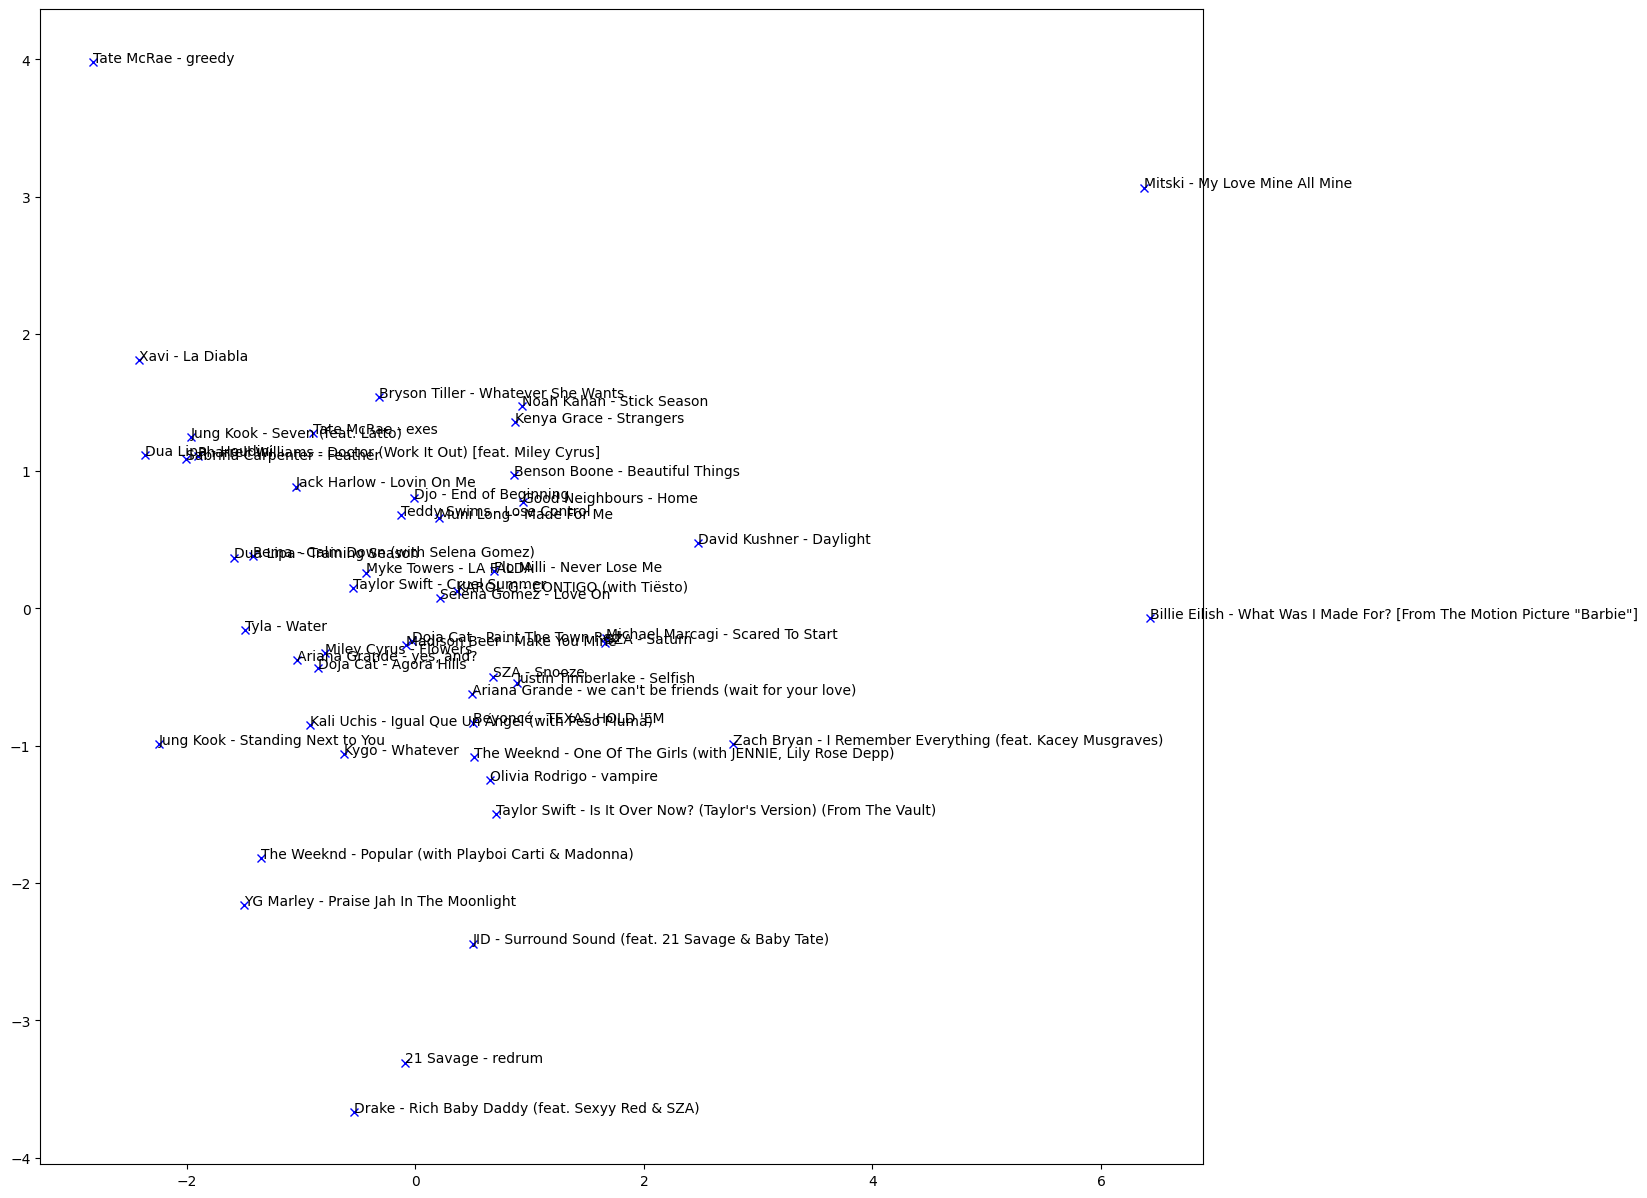

In [36]:
#Plot
plt.figure(figsize=(8, 8))
fig,ax = plt.subplots(figsize=(15,15))
x = reduced_features[:,0]
y = reduced_features[:,1]
ax.plot(x,y,"bx")
annotations = subset_features.index
for i, label in enumerate(annotations):
    ax.annotate(label, (x[i], y[i]),alpha=1)